# Prueba Fundamentos de Data Science : Analizando la Rotación de Clientes en Telecomunicaciones

**Requisitos**

Tu tarea es limpiar y explorar un dataset para los ejecutivos de una empresa de telecomunicaciones que describe tendencias en la rotación de sus clientes.
**Dataset**

- El dataset puede ser encontrado en https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Tareas a realizar**

1. Limpieza de datos con Python:

* Identificar y solucionar cualquier valor duplicado.
* Asegurarse de que todas las columnas coincidan con los tipos de datos indicados en el diccionario de datos.
* Identificar y solucionar cualquier inconsistencia en los valores categóricos (ejemplo: cat, Cat, cats).
* Identificar y solucionar cualquier valor faltante en el dataset. Rellenar los valores faltantes con un marcador adecuado para el tipo de dato.
* Identificar y solucionar cualquier punto de dato inapropiado o inusual (ejemplo: la edad no puede ser 325).

2. Exploración de datos con Python:
* Un archivo .ipynb claramente comentado con todo el código utilizado para la limpieza y exploración de datos. Para cumplir con los requisitos anteriores, este archivo tendrá un mínimo de 4 visualizaciones.
* Subir un repositorio a una plataforma de control de versiones (por ejemplo, GitHub) con un TAG incluido para verificar la fecha de entrega. El repositorio debe contener el archivo .ipynb.
* NOTA: Debes enviar un archivo y un enlace al repositorio con el TAG correspondiente. Las presentaciones de enlaces sin el archivo o sin el TAG serán consideradas no presentadas.

In [5]:
#Nombre del estudiante: Cristian Rivas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [6]:
#Obtenido de la resolución hecha por el profesor Iair Linker de una prueba distinta, anterior a esta.
path = r'C:\SOFTWARE DEVELOPMENT\CodingDojo-Examenes\Examen intento 3\examen-intento-3\WA_Fn-UseC_-Telco-Customer-Churn.csv'
df = pd.read_csv(filepath_or_buffer=path, sep= ',', header=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Limpieza de datos con Python

### **Detección y eliminación de valores duplicados** 

In [7]:
#Obtenido de la resolución hecha por el profesor Iair Linker de una prueba distinta, anterior a esta.
# Identificar duplicados
duplicados = df.duplicated()
# Contar el número de duplicados
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 0


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Verificación y ajuste de tipos de datos**

In [8]:
#Adaptado de la resolución hecha por el profesor Iair Linker de una prueba distinta, anterior a esta.

# Definiendo el diccionario de tipos de datos para el dataset de telecomunicaciones
diccionario = {
    'customerID': 'string',
    'gender': 'string',
    'SeniorCitizen': 'float64', #Solo puede ser 0 o 1
    'Partner': 'string',
    'Dependents': 'string',
    'tenure': 'float64', 
    'PhoneService': 'string',
    'MultipleLines': 'string',
    'InternetService': 'string',
    'OnlineSecurity': 'string',
    'OnlineBackup': 'string',
    'DeviceProtection': 'string',
    'TechSupport': 'string',
    'StreamingTV': 'string',
    'StreamingMovies': 'string',
    'Contract': 'string',
    'PaperlessBilling': 'string',
    'PaymentMethod': 'string',
    'MonthlyCharges': 'float64', 
    'TotalCharges': 'float64',  
    'Churn': 'string'
}

# Función para mapear tipos personalizados a tipos de pandas
def map_tipo(tipo_personalizado):
    mapping = {
        'string': 'string',
        'float64': 'float64'
    }
    return mapping.get(tipo_personalizado, 'object')  # 'object' como valor por defecto

# Crear un nuevo diccionario mapeado para pandas
diccionario_mapeado = {col: map_tipo(tipo) for col, tipo in diccionario.items()}

print("Diccionario Mapeado para pandas:")
print(diccionario_mapeado)


Diccionario Mapeado para pandas:
{'customerID': 'string', 'gender': 'string', 'SeniorCitizen': 'float64', 'Partner': 'string', 'Dependents': 'string', 'tenure': 'float64', 'PhoneService': 'string', 'MultipleLines': 'string', 'InternetService': 'string', 'OnlineSecurity': 'string', 'OnlineBackup': 'string', 'DeviceProtection': 'string', 'TechSupport': 'string', 'StreamingTV': 'string', 'StreamingMovies': 'string', 'Contract': 'string', 'PaperlessBilling': 'string', 'PaymentMethod': 'string', 'MonthlyCharges': 'float64', 'TotalCharges': 'float64', 'Churn': 'string'}


In [9]:
#Adaptado de la resolución hecha por el profesor Iair Linker de una prueba distinta, anterior a esta.

# Validación de tipos de datos
def validar_tipos(df, diccionario):
    """
    Valida que cada columna en df tenga el tipo de dato especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - mismatches: Lista de tuplas con (columna, tipo_actual, tipo_esperado) para discrepancias.
    """
    mismatches = []
    for columna, tipo_esperado in diccionario.items():
        if columna in df.columns:
            tipo_actual = str(df[columna].dtype)
            # Verificar si el tipo actual coincide con el tipo esperado
            if tipo_actual != tipo_esperado:
                mismatches.append((columna, tipo_actual, tipo_esperado))
        else:
            mismatches.append((columna, 'No existe en el DataFrame', tipo_esperado))
    return mismatches

# Ejecutar la validación
mismatches = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados
if not mismatches:
    print("Todos los tipos de datos son correctos.")
else:
    print("Discrepancias encontradas en los tipos de datos:")
    for columna, actual, esperado in mismatches:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")

Discrepancias encontradas en los tipos de datos:
- Columna 'customerID': Tipo actual -> object, Tipo esperado -> string
- Columna 'gender': Tipo actual -> object, Tipo esperado -> string
- Columna 'SeniorCitizen': Tipo actual -> int64, Tipo esperado -> float64
- Columna 'Partner': Tipo actual -> object, Tipo esperado -> string
- Columna 'Dependents': Tipo actual -> object, Tipo esperado -> string
- Columna 'tenure': Tipo actual -> int64, Tipo esperado -> float64
- Columna 'PhoneService': Tipo actual -> object, Tipo esperado -> string
- Columna 'MultipleLines': Tipo actual -> object, Tipo esperado -> string
- Columna 'InternetService': Tipo actual -> object, Tipo esperado -> string
- Columna 'OnlineSecurity': Tipo actual -> object, Tipo esperado -> string
- Columna 'OnlineBackup': Tipo actual -> object, Tipo esperado -> string
- Columna 'DeviceProtection': Tipo actual -> object, Tipo esperado -> string
- Columna 'TechSupport': Tipo actual -> object, Tipo esperado -> string
- Columna 'St

In [10]:
#Adaptado de la resolución hecha por el profesor Iair Linker de una prueba distinta, anterior a esta.

def corregir_tipos(df, diccionario):
    """
    Corrige los tipos de datos de las columnas en df según lo especificado en diccionario.
    
    Parámetros:
    - df: DataFrame de pandas.
    - diccionario: Diccionario con columnas como llaves y tipos de datos como valores.
    
    Retorna:
    - df: DataFrame con tipos de datos corregidos.
    """
    for columna, tipo in diccionario.items():
        if columna in df.columns:
            try:
                # Convertir al tipo especificado en el diccionario
                df[columna] = df[columna].astype(tipo)
            except Exception as e:
                print(f"Error al convertir la columna '{columna}' a '{tipo}': {e}")
    return df

# Corregir los tipos de datos usando el diccionario mapeado
df = corregir_tipos(df, diccionario_mapeado)

# Volver a validar los tipos después de la corrección
mismatches_post = validar_tipos(df, diccionario_mapeado)

# Mostrar resultados después de la corrección
if not mismatches_post:
    print("Todos los tipos de datos han sido corregidos correctamente.")
else:
    print("Aún existen discrepancias después de la corrección:")
    for columna, actual, esperado in mismatches_post:
        print(f"- Columna '{columna}': Tipo actual -> {actual}, Tipo esperado -> {esperado}")


Error al convertir la columna 'TotalCharges' a 'float64': could not convert string to float: ' '
Aún existen discrepancias después de la corrección:
- Columna 'TotalCharges': Tipo actual -> object, Tipo esperado -> float64


In [11]:
# Inspirado por ChatGPT, corregido manualmente
# Identificar y contar valores únicos no convertibles en 'TotalCharges'
valores_no_convertibles = df['TotalCharges'].loc[df['TotalCharges'].apply(lambda x: pd.to_numeric(x, errors='coerce')).isnull()]
conteo_valores_problematicos = valores_no_convertibles.value_counts()

# Imprimir los valores problemáticos y su cantidad antes de reemplazarlos por NaN
print("Valores no convertibles encontrados en 'TotalCharges' y su cantidad:")
for valor, count in conteo_valores_problematicos.items():
    print(f"Valor no convertible: '{valor}' - Cantidad: {count}", "\n")

# Reemplazar los valores problemáticos (espacios en blanco u otros no numéricos) con NaN
df['TotalCharges'] = df['TotalCharges'].replace(conteo_valores_problematicos.index, np.nan)

# Contar la cantidad de NaN después de reemplazar los valores problemáticos
nan_introducidos = df['TotalCharges'].isna().sum()  # Cantidad de nuevos NaN introducidos
valores_validos = df['TotalCharges'].notna().sum()  # Cantidad de valores válidos que quedan

# Mostrar los resultados
print(f"Cantidad de nuevos valores NaN introducidos: {nan_introducidos}")
print(f"Cantidad de valores válidos restantes en 'TotalCharges': {valores_validos}")

# Intentar la conversión de 'TotalCharges' a float64 después de reemplazar los valores problemáticos
try:
    df['TotalCharges'] = df['TotalCharges'].astype('float64')
    print("\nConversión de 'TotalCharges' a float64 completada.")
except Exception as e:
    print(f"Error al convertir 'TotalCharges' a float64: {e}")

# Confirmar el tipo de dato y verificar la conversión
print("\nTipo de dato de 'TotalCharges' después de la conversión:")
print(df['TotalCharges'].dtype)



Valores no convertibles encontrados en 'TotalCharges' y su cantidad:
Valor no convertible: ' ' - Cantidad: 11 

Cantidad de nuevos valores NaN introducidos: 11
Cantidad de valores válidos restantes en 'TotalCharges': 7032

Conversión de 'TotalCharges' a float64 completada.

Tipo de dato de 'TotalCharges' después de la conversión:
float64


In [12]:
# Adaptado de la resolución hecha por el profesor Iair Linker de una prueba distinta, anterior a esta.
# Lista de columnas categóricas a revisar en el dataset de telecomunicaciones
categorical_cols = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
    'PaperlessBilling', 'PaymentMethod', 'Churn'
]

# Diccionario para almacenar los valores únicos
valores_unicos = {}
for col in categorical_cols:
    # Obtener los valores únicos, eliminando NaN, y convertirlos en una lista
    unique_vals = df[col].dropna().unique().tolist()
    valores_unicos[col] = unique_vals
    print(f"\nValores únicos en la columna '{col}':")
    print(unique_vals)

# Ruta donde se guardará el archivo JSON
ruta_json = r'C:\SOFTWARE DEVELOPMENT\CodingDojo-Examenes\Examen intento 3\examen-intento-3\valores_unicos_iniciales.json'

# Guardar el diccionario en un archivo JSON
with open(ruta_json, 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print(f"\nValores únicos guardados en '{ruta_json}'")



Valores únicos en la columna 'gender':
['Female', 'Male']

Valores únicos en la columna 'Partner':
['Yes', 'No']

Valores únicos en la columna 'Dependents':
['No', 'Yes']

Valores únicos en la columna 'PhoneService':
['No', 'Yes']

Valores únicos en la columna 'MultipleLines':
['No phone service', 'No', 'Yes']

Valores únicos en la columna 'InternetService':
['DSL', 'Fiber optic', 'No']

Valores únicos en la columna 'OnlineSecurity':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'OnlineBackup':
['Yes', 'No', 'No internet service']

Valores únicos en la columna 'DeviceProtection':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'TechSupport':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'StreamingTV':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'StreamingMovies':
['No', 'Yes', 'No internet service']

Valores únicos en la columna 'Contract':
['Month-to-month', 'One year', 'Two year']

Valores únicos en 

In [13]:
#Adaptado de la resolución hecha por el profesor Iair Linker de una prueba distinta, anterior a esta.

# Convertir todas las cadenas en las columnas categóricas a minúsculas
df[categorical_cols] = df[categorical_cols].apply(lambda x: x.str.lower())

# Verificar los cambios
for col in categorical_cols:
    print(f"\nValores únicos después de limpieza en '{col}':")
    print(df[col].unique().tolist())


Valores únicos después de limpieza en 'gender':
['female', 'male']

Valores únicos después de limpieza en 'Partner':
['yes', 'no']

Valores únicos después de limpieza en 'Dependents':
['no', 'yes']

Valores únicos después de limpieza en 'PhoneService':
['no', 'yes']

Valores únicos después de limpieza en 'MultipleLines':
['no phone service', 'no', 'yes']

Valores únicos después de limpieza en 'InternetService':
['dsl', 'fiber optic', 'no']

Valores únicos después de limpieza en 'OnlineSecurity':
['no', 'yes', 'no internet service']

Valores únicos después de limpieza en 'OnlineBackup':
['yes', 'no', 'no internet service']

Valores únicos después de limpieza en 'DeviceProtection':
['no', 'yes', 'no internet service']

Valores únicos después de limpieza en 'TechSupport':
['no', 'yes', 'no internet service']

Valores únicos después de limpieza en 'StreamingTV':
['no', 'yes', 'no internet service']

Valores únicos después de limpieza en 'StreamingMovies':
['no', 'yes', 'no internet servic

In [14]:
#Adaptado de la resolución hecha por el profesor Iair Linker de una prueba distinta, anterior a esta.

# Guardar los valores únicos en un archivo JSON para referencia
valores_unicos = {}
for col in categorical_cols:
    unique_vals = df[col].dropna().unique().tolist()
    valores_unicos[col] = unique_vals
# Guardar en 'valores_unicos.json'
with open(r'C:\SOFTWARE DEVELOPMENT\CodingDojo-Examenes\Examen intento 3\examen-intento-3\valores_unicos_finales.json', 'w', encoding='utf-8') as f:
    json.dump(valores_unicos, f, ensure_ascii=False, indent=4)
    print("Valores únicos guardados en 'valores_unicos_finales.json'.")

Valores únicos guardados en 'valores_unicos_finales.json'.


### **Manejo de valores faltantes**

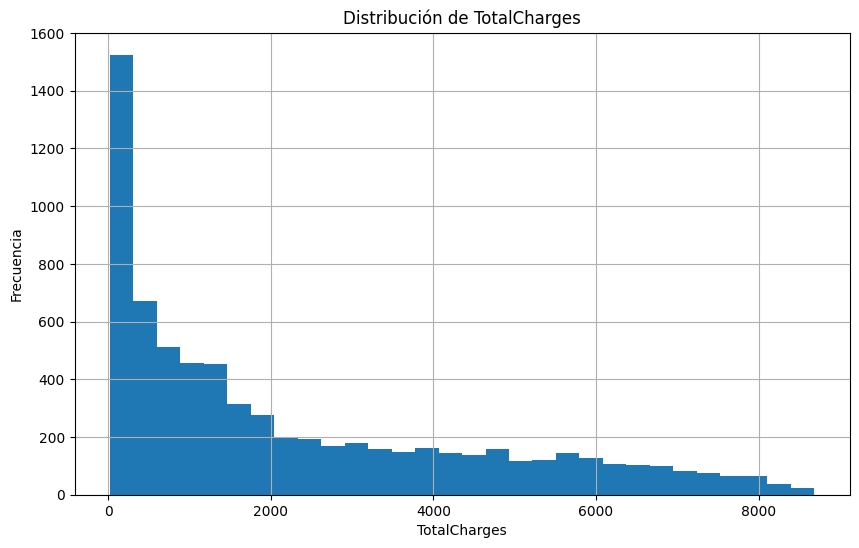

In [15]:
#Obtenido de la resolución hecha por el profesor Iair Linker de una prueba distinta, anterior a esta.

# Histograma
plt.figure(figsize=(10, 6))
df['TotalCharges'].hist(bins=30)
plt.title('Distribución de TotalCharges')
plt.xlabel('TotalCharges')
plt.ylabel('Frecuencia')
plt.show()

In [16]:
'''Debido a la existencia de una notable desviación de los datos hacia los valores más bajos, 
se ha optado por utilizar la mediana para rellenar los 11 datos faltantes. En este caso, no fué
necesario mostrar dos gráficas comparativas entre antes y después de sustituir los NaN pues los 
datos faltantes eran muy reducidos en comparación al total de datos de la columna TotalCharges. 
Se ha comprobado que la diferencia entre ambas gráficas no es apreciable'''

# Calcular la mediana de TotalCharges
mediana_total_charges = df['TotalCharges'].median()

# Rellenar los NaN en TotalCharges con la mediana, sin usar inplace=True
df['TotalCharges'] = df['TotalCharges'].fillna(mediana_total_charges)

# Verificar que no queden NaN
print(f"Cantidad de NaN en 'TotalCharges' después de rellenar: {df['TotalCharges'].isna().sum()}")


Cantidad de NaN en 'TotalCharges' después de rellenar: 0


In [17]:
#Inspirado por la resolución hecha por el profesor Iair Linker de una prueba distinta, anterior a esta.

# Identificar columnas numéricas, excluyendo 'SeniorCitizen'
numeric_columns = df.select_dtypes(include=['float64']).columns
numeric_columns = numeric_columns.drop('SeniorCitizen')

# Detectar valores negativos en las columnas numéricas
negative_values = df[numeric_columns] < 0
num_negative_values = negative_values.sum().sum()
print(f"Número total de valores negativos en los campos {', '.join(numeric_columns)}: {num_negative_values}")

# Mostrar las filas con valores negativos (si existen)
if num_negative_values > 0:
    print("Filas con valores negativos en columnas numéricas:")
    print(df[negative_values.any(axis=1)])

# Verificar que 'SeniorCitizen' solo contiene ceros y unos
valid_senior_values = df['SeniorCitizen'].isin([0, 1])
num_invalid_senior = (~valid_senior_values).sum()
print(f"Número de valores no válidos en 'SeniorCitizen' (esperado solo 0 y 1): {num_invalid_senior}")

# Mostrar las filas con valores no válidos en 'SeniorCitizen' (si existen)
if num_invalid_senior > 0:
    print("Filas con valores no válidos en 'SeniorCitizen':")
    print(df[~valid_senior_values])


Número total de valores negativos en los campos tenure, MonthlyCharges, TotalCharges: 0
Número de valores no válidos en 'SeniorCitizen' (esperado solo 0 y 1): 0


## Exploración de datos con Python

### Gráfico 1

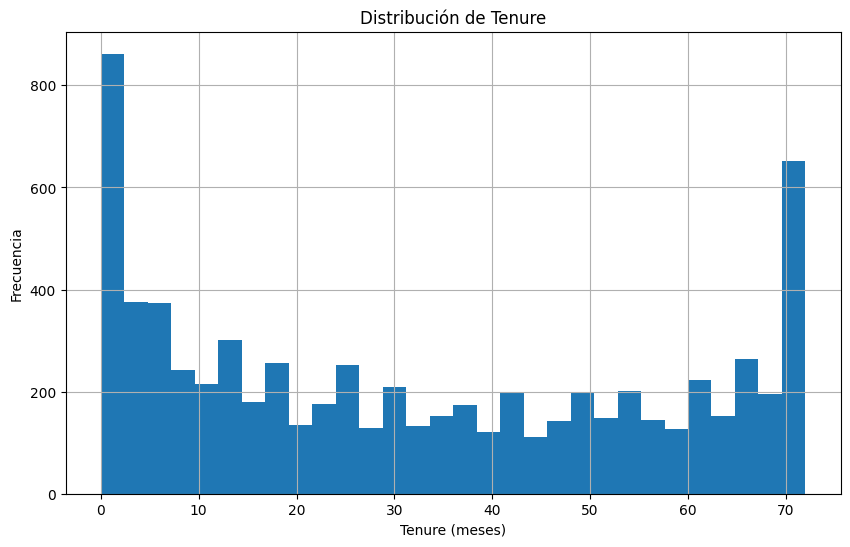

In [18]:
'''La distribución de tenure muestra que hay una gran concentración de clientes con una permanencia muy corta (0-5 meses)
 y también de clientes de largo plazo (70-75 meses), lo que sugiere que algunos clientes abandonan el servicio rápidamente,
   mientras que otros permanecen leales durante varios años. En los valores intermedios (entre 10 y 60 meses), la frecuencia 
   es menor y más dispersa, lo que podría indicar que los clientes tienden a abandonar el servicio en esos periodos o que 
   permanecen solo durante ciertos plazos específicos, posiblemente debido a contratos de corto plazo.'''

# 1. Gráfica Univariada - Histograma de tenure
plt.figure(figsize=(10, 6))
df['tenure'].hist(bins=30)
plt.title('Distribución de Tenure')
plt.xlabel('Tenure (meses)')
plt.ylabel('Frecuencia')
plt.show()


### Gráfico 2

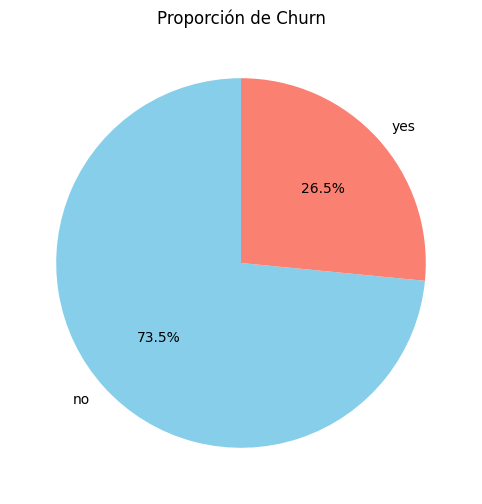

In [19]:
'''Observamos que el 26.5% de los clientes han dejado el servicio, mientras que el 73.5% ha permanecido. Esto sugiere que,
aunque la mayoría de los clientes siguen siendo leales, hay una cantidad significativa que decide abandonar el servicio. 
Este porcentaje de abandono es relevante para la empresa, ya que indica una posible área de mejora en la retención de clientes.
Identificar las características de los clientes que abandonan puede ayudar a diseñar estrategias efectivas para reducir el churn.'''

# 2. Gráfica Univariada - Gráfico de torta (pie chart) de Churn
plt.figure(figsize=(8, 6))
df['Churn'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title('Proporción de Churn')
plt.ylabel('')
plt.show()


### Gráfico 3

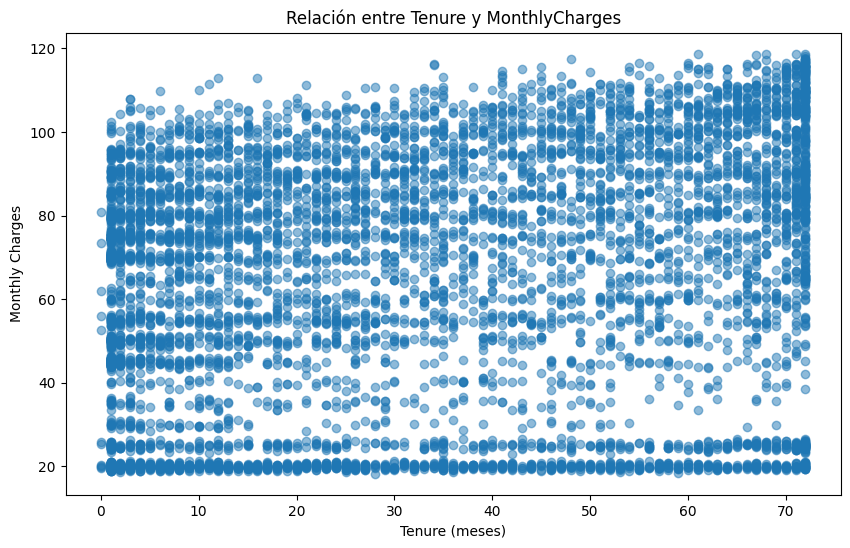

In [20]:
'''No parece haber una relación clara que indique que el tiempo que el cliente ha estado con la empresa (Tenure)
dependa significativamente de los cargos mensuales (MonthlyCharges). Los datos están distribuidos de manera uniforme
en la mayoría de los rangos de MonthlyCharges y Tenure. Esto sugiere que los clientes no necesariamente permanecen
más tiempo debido a tarifas más bajas o más altas.'''

# 3. Gráfica Multivariada - Gráfico de dispersión de tenure vs MonthlyCharges
plt.figure(figsize=(10, 6))
plt.scatter(df['tenure'], df['MonthlyCharges'], alpha=0.5)
plt.title('Relación entre Tenure y MonthlyCharges')
plt.xlabel('Tenure (meses)')
plt.ylabel('Monthly Charges')
plt.show()


### Gráfico 4

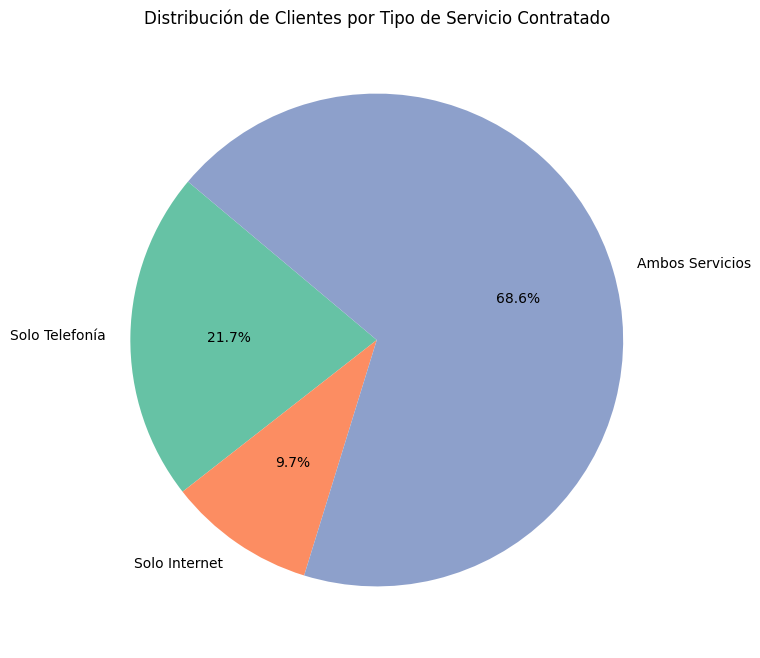

In [21]:
'''La gráfica muestra que hay una proporción significativa de clientes (21.7%) que actualmente solo tienen el servicio
de telefonía, lo cual representa una oportunidad de negocio para ofrecerles el servicio de internet y productos 
complementarios, como seguridad en línea o respaldo en la nube. Esto sugiere que la empresa podría enfocarse en 
estrategias de venta cruzada para este segmento, incentivando la adopción del servicio de internet entre estos clientes.
De esta forma, se podría aumentar el ingreso promedio por cliente y mejorar la retención a través de paquetes
de servicios más completos.'''
#El codigo para la grafica fue inspirado por ChatGPT, corroborado manualmente.
## 4. Gráfica Multivariada - Distribución de clientes por tipo de servicio contratado
# Crear las categorías
solo_telefonia = df[(df['PhoneService'] == 'yes') & (df['InternetService'] == 'no')].shape[0]
solo_internet = df[(df['PhoneService'] == 'no') & (df['InternetService'] != 'no')].shape[0]
ambos_servicios = df[(df['PhoneService'] == 'yes') & (df['InternetService'] != 'no')].shape[0]

# Definir las etiquetas y los tamaños para el gráfico de pie
labels = ['Solo Telefonía', 'Solo Internet', 'Ambos Servicios']
sizes = [solo_telefonia, solo_internet, ambos_servicios]
colors = ['#66c2a5', '#fc8d62', '#8da0cb']

# Crear el gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución de Clientes por Tipo de Servicio Contratado')
plt.show()

### Gráfico 5

In [22]:
'''El gráfico de torta muestra que la mayoría de los clientes (64%) no son adultos mayores (SeniorCitizen) y han permanecido con la compañía,
mientras que el 19.8% de todos los clientes son no seniors que han abandonado el servicio. Esto indica que la mayor parte de los clientes que
abandonan el servicio son no seniors. Por otro lado, el 9.5% de todos los clientes son seniors que permanecen con la compañía, y el 6.8% 
corresponde a seniors que abandonaron el servicio. Estos datos sugieren que, aunque los no seniors constituyen el grupo principal de churn, 
una proporción significativa de seniors también tiende a abandonar el servicio. La empresa podría investigar las razones detrás del churn 
en cada grupo para implementar estrategias de retención más específicas.'''
#El codigo para la grafica fue inspirado por ChatGPT, corroborado manualmente.
# Se ajustan los valores de las etiquetas y tamaños para cambiar la posición de las porciones azul y verde
labels = [
    'Senior Citizen - Churn',
    'No Senior Citizen - Churn',
    'Senior Citizen - No Churn',
    'No Senior Citizen - No Churn'
]

sizes = [
    churn_counts.get((1, 'yes'), 0),   # Senior Citizen y Churn
    churn_counts.get((0, 'yes'), 0),   # No Senior Citizen y Churn
    churn_counts.get((1, 'no'), 0),    # Senior Citizen y No Churn
    churn_counts.get((0, 'no'), 0)     # No Senior Citizen y No Churn
]

# Colores para cada segmento del gráfico de pie
colors = ['#ff9999', '#99ff99', '#66b3ff', '#ffcc99']

# Crear el gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución de Clientes por SeniorCitizen y Churn')
plt.show()


NameError: name 'churn_counts' is not defined